<a href="https://colab.research.google.com/github/ihawryluk/advent-of-code-2023/blob/main/AoC_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Task 1

In [2]:
test_01 = """O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#...."""

test_01_out = """OOOO.#.O..
OO..#....#
OO..O##..O
O..#.OO...
........#.
..#....#.#
..O..#.O.O
..O.......
#....###..
#....#...."""

In [3]:
def replace(input):
  input = input.replace('O', '0')
  input = input.replace('#', '8')
  input = input.replace('.', '1')
  return input

def string_to_array(input):
  split_lines = input.split('\n')
  list_of_arrays = []
  for line in split_lines:
    line = re.sub(r'([0-9])(?!$)', r'\1,', line)   # insert comma after every element
    line = np.fromstring(line, dtype=int, sep=',')
    list_of_arrays.append(line)
  return np.stack(list_of_arrays)

In [4]:
test_01_rep = replace(test_01)
string_to_array(test_01_rep)

array([[0, 1, 1, 1, 1, 8, 1, 1, 1, 1],
       [0, 1, 0, 0, 8, 1, 1, 1, 1, 8],
       [1, 1, 1, 1, 1, 8, 8, 1, 1, 1],
       [0, 0, 1, 8, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 0, 8, 1],
       [0, 1, 8, 1, 1, 0, 1, 8, 1, 8],
       [1, 1, 0, 1, 1, 8, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [8, 1, 1, 1, 1, 8, 8, 8, 1, 1],
       [8, 0, 0, 1, 1, 8, 1, 1, 1, 1]])

In [5]:
array = string_to_array(test_01_rep)
out = string_to_array(replace(test_01_out))

In [6]:
stones = np.argwhere(array == 0)
stones

array([[0, 0],
       [1, 0],
       [1, 2],
       [1, 3],
       [3, 0],
       [3, 1],
       [3, 4],
       [3, 9],
       [4, 1],
       [4, 7],
       [5, 0],
       [5, 5],
       [6, 2],
       [6, 6],
       [6, 9],
       [7, 7],
       [9, 1],
       [9, 2]])

In [7]:
np.where(array == 0)

(array([0, 1, 1, 1, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 9, 9]),
 array([0, 0, 2, 3, 0, 1, 4, 9, 1, 7, 0, 5, 2, 6, 9, 7, 1, 2]))

In [8]:
len(np.where(array == 0)[0])

18

In [9]:
stones_row, stones_col = np.where(array == 0)[0], np.where(array == 0)[1]


In [10]:
array

array([[0, 1, 1, 1, 1, 8, 1, 1, 1, 1],
       [0, 1, 0, 0, 8, 1, 1, 1, 1, 8],
       [1, 1, 1, 1, 1, 8, 8, 1, 1, 1],
       [0, 0, 1, 8, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 0, 8, 1],
       [0, 1, 8, 1, 1, 0, 1, 8, 1, 8],
       [1, 1, 0, 1, 1, 8, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [8, 1, 1, 1, 1, 8, 8, 8, 1, 1],
       [8, 0, 0, 1, 1, 8, 1, 1, 1, 1]])

In [11]:
def tilt(array):
  # find all indices of stones - 0
  stones_row, stones_col = np.where(array == 0)[0], np.where(array == 0)[1]
  for i in range(len(stones_col)):
    col_num = stones_col[i]
    row_num = stones_row[i]
    # roll the stone
    j = row_num - 1
    while (j >= 0) and (array[j, col_num] == 1):
      array[j+1, col_num] = 1
      array[j, col_num] = 0
      j = j-1
  return array





In [12]:
array

array([[0, 1, 1, 1, 1, 8, 1, 1, 1, 1],
       [0, 1, 0, 0, 8, 1, 1, 1, 1, 8],
       [1, 1, 1, 1, 1, 8, 8, 1, 1, 1],
       [0, 0, 1, 8, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 0, 8, 1],
       [0, 1, 8, 1, 1, 0, 1, 8, 1, 8],
       [1, 1, 0, 1, 1, 8, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [8, 1, 1, 1, 1, 8, 8, 8, 1, 1],
       [8, 0, 0, 1, 1, 8, 1, 1, 1, 1]])

In [13]:
tilt(array)

array([[0, 0, 0, 0, 1, 8, 1, 0, 1, 1],
       [0, 0, 1, 1, 8, 1, 1, 1, 1, 8],
       [0, 0, 1, 1, 0, 8, 8, 1, 1, 0],
       [0, 1, 1, 8, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 8, 1],
       [1, 1, 8, 1, 1, 1, 1, 8, 1, 8],
       [1, 1, 0, 1, 1, 8, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [8, 1, 1, 1, 1, 8, 8, 8, 1, 1],
       [8, 1, 1, 1, 1, 8, 1, 1, 1, 1]])

In [14]:
(tilt(array) == out).all()

True

In [15]:
def get_support(array):
  result = 0
  n = array.shape[1]
  stones_row = np.where(array == 0)[0]
  for i in stones_row:
    result += n - i
  return result



In [16]:
get_support(out)

136

In [17]:
def get_answer(input):
  input = replace(input)
  array = string_to_array(input)
  array = tilt(array)
  result = get_support(array)
  return result


In [18]:
get_answer

<function __main__.get_answer(input)>

## input

In [19]:
input = """...###.#OO..#.O......#...#...O..#.....#...O#..O#........O.#O#O..O.....O.......#O.............O#.O###
O.OOO..##O....#O.O.OO#......O...#O.........O....O..OO....#OOO.#..#..........O.O...##...#........O..#
.#..O..O.#.....O...O.....#O.OOOO..O.#.O#OO.........O.#.O#O.O.#...O#..........OOO.#...#..O#..####O.OO
.#..O....#.#..O.....O..O......O......O.O.O.#..O..#.OO.O.OOO..O#.O.##...OO.#.#.O..#...####O..#..#O...
.##.O......#.OO.O.O...O.....##O.#.#.......##.O....O...O.O.####...#.....O#.O....#O.#..O......O.......
O.###.#.#.O.O........#O.#.#..O#.#.OO....#O....O..##.#O.#.O.###.#..#..#.#.O....#..O......OO.#OO#...O#
.....O..O#..O.O...O....#O#.O.#O...O##OO.O.#O....#.#.....#..O#...#..##....#.OOO..#O.....#..#O#OO.O...
#............O#O.#.#.....O.O..OO....#....#..OO#.#O.OOO..#O...O#.....#.O....O.O..#....O..#...#OO#....
..#.#O#..OO.O...##..#......#OO.....#.#.#.....#.O.....O.......#.##.......#O..OOO...........O.....O.O.
......O#O......OO#..O.#O..O..#....O..O.........O...#.#.##.O....O..O..O..O#.O.O.OOOOO....O#.O.......#
O##...O#...#..#.O.....#.O.###.O......#..#..O.#.O..........O..#.O.......#O......#.O.##....#.#.#...#..
#..#.O..#..........#.O.#.O....#O#...OOOO......#...#.O.....O.OO.O....#.......O.O....O.O#.#O.###O.OO.#
OO.O#.O.......#.OO##....#O.#.O...O..#O.OO.....O..O#..##.O#...O...O.#.#O..O..O#........OO#.....O#..##
......O....O...#O##....OOO..O.O..O.......OO#O....###..O..##...O#.#.O.O..O.OO##....O.O#..O.#.#O#.#...
..O....#.....O..O.OO#..#.##..........#OO...#..#.O...O.O#...#....O.O..O...O....OO...O..OO#O....O..#O.
O....OO............O#.#........#..O.O...#OOO#.............#...OO......O#......O..O....OO...O..O...O.
...O##O.#..........O.O..##....O.##....O...#......O.O...O..O.O..O.##.#..#..O.O#.O.##..O..OO...OO.....
#.O#.#....#....O..O.O.O.###..O.O......O...OO#..........OO.....#O..#........#..#..O.#...##OO.#O#.#.#.
.##OO#...#O....O.O.#.#O....O.#...OO.....O...O.#.....O.OO.O..OO.....O...#..#.....#..#.....#..OOO..O##
.O#.........O.#..O.O.....O#.O##.##......OO.O.#......#...O##.O..#.....O...................#...O..O.#.
..###...#O...O#..#......OO#...##.#.O....#.##OO.....O..O......O#.O....O.#..O#.O#O.#.#O..##.O...O..O.#
.........#O...#..O.##.OO.....#...#.....O.O.O....O..##.O.....##OOO..#..O.#....#.##..O..##.O..#...#.#O
.O..#.#.O#..#OOOO#...#.O..#O#....OO....O..O..#...O..#...#........#O.O...#....O.#...#..#....O..OOOO.O
....#.#O#.O.O.O.OO.#....OO.....O.#....#...#..........#.##...##.OO#..OO.....O.....O#..O.#.....OO..#..
.....OOOOO...O.........#.#....#..OO##.##.....#O....O..##..O.......#.....#.O.....#..O..OO.........O..
...#.#.O###..#...O....OO....O.#.O.....##OO.O#..#.##....O.....OO##...O#OO..O.OO...O.OO..O#..O#.O..#.#
..OOO.OO...##O.O.O#.O...O..O#..OOO...##.#..#.#.#...O.#O#...O#O.OOO.O.OO.O..#.OOOO#.........#..OO...O
O...O#.O.OO#.OO.##.....#....#...#.........###.O.#.........O......#OO..O...OO.#O..#..#..O..O..##....#
O.OOO#....O..O#O....O...O.#......##O...OO..O.............#.#....O#..#O.#OO.O...OO...OOO...O.O.....O.
..#..O.OOO.....O#....#.#..O.......O...#.......#.OO..O.....#.#.#..O....#.#...O.O....O.#.......#.O##..
.#..O.....#.#..#.#.#..OO.O...O........OO#.O..O..#..O#.##O..#....#....OO.....#..#O.........#.O..O.O.O
...O.##OO.#.......O...O.O.#.O.O..#.O...O.O..OO..O..#..OO..##....##.#.....#.O.#..........O.#.OOO#O...
...O..O....##...#...O#.O....O.O...#OO..O.#OO#........#O...OO.#..OO.#O.O..#....O#.O....O#......O#...#
..OO#O.O...#..#.#.......O.O...##....O..#.##..#...#...O...#.O#O.O....O......#....#...O..##..#O..O....
.O...##O.#O.....O........O...O#....##......##....O.....##.....##......O....O..#..#O.#.O.OO#O#O....##
.........#O.O.O.OO..#.O#.##.....#.#O.O..O#.O........O....#O#.##O.#.O....#..OO.O.#...OO.#.O.##O...O##
..O##O.O......#O.O.#..O.#.........O...#..#..#..##OO....O..OO.#.#...OO...#O..#...O.###...O#.#......O.
......O..#O....O##...O##..........O...O....O........O..#OOO...OO..#.....##O.#.O..#....OO....O...#O..
O..#.O..#.O..OOO..O.O.#.O...#O..#.O..#O......O.OO..O.#..O..##.....##....O#OOO..#.#O...O##...OO.#O#.O
O##.O...O.O.....O.#O..O..#.....#O.#.....###..OOO.OO#...#.O..O...........O.....O..#...O.#...#..O....O
...O.OO.....#O..O..#O..#O....OO....O....#O..#OO...O.#...O..#....#....#..OO.O.##.O#O...O.#O...O#.....
.....#...OO.........##OO.#.#........#..O..O.#.#.OO.#..#..#....#.O#..........#..O.O...O.#OO.....##...
#...#.....OO.....OOOO...#..#O.#..##.#..#..O.O##.O#.O#.O.O...#........#...O#......O.O#O..#..#..O...#.
.....O..#.OO.#O.O...#...#..#.......O#.##..OOOO.........OO.O.#O#...OO.#...O....###O..OO#.O.....#.##.O
#O..O#O.#..O#.O.O.O...O...OO...#.##....O#.......OO.O...#.....###.......O..#.O..O...OO#.O.#O.O.O.O.O.
OO.....O.............#.O...OO..##O.O#.#O.#....O..........O..O#.........#.........O#.#....#O#..#..##O
#..#..#........O.OO....O.....O..#O..O#.#O#O...#.##O..O...O.#O.#OOOO#.OO.#..OO##..#O.#.O.O...O..O#...
...#........O...O.O..O.O#.....#....O.#.#OO.#...#..O#O.##..#.##...O#.#.....O..O.....#..O#.....O......
..O.O.O###..#..O.#..#........O..O#..##O#....#...#.....O.......OO...O....##......#.O..O..O.O.O.O..#O.
..O..O..OOO.O##..O..O#..OO###.#....O..O...##..OOO...O.......#..#..OO..O...OO#.O.....O.O..O.OO.#....O
O....O...#.O#O#....#.O....##...O.........O...#.#.#O.OO..O#....O.##.....#.#..#..#....#.#O..O.O.#..O..
O................O#O.O......##..#O...O....O#.O..#....O......O.#..O....O.#...O.....O##.#.O....OOO.#.#
...O#....#..O.O........O#.O#.#O.#.....#....O#....#..#......O.....#.....O#O..O..OO.#.#OOO#O.O.O#.....
.#.#O..##.O.O.O#...O...#...#....O..OO..O..#..#....###.O#.OO.O....O....OOO...O....OOO#..#..O.....#.OO
...OOO..O.O.....O#.##O#.#.#.O..#O.....#O....O#O...O....O#.O#..O#.O..#.#.#O..O..O.#....O.....#O.....#
.O#...#...O.....O..#.O.#.....O...O#..#.....O.O#O..O.....#.#.O..O..#.OO..#O...O......#OOO..#.O..O..#.
O.#.OO.#.O#O#...O....#...###OO..OOO.#O..O.O..O........##...O#...#...O##OO.O#....O.#O.O..O#.O..O.#..O
...#...O.O.###.O#O......#.OOOO...O...##..#O.#.O.#O.###.#O....#.OO....O......#..OO.O.#.O...O.O....O..
...O#.O..#......#...O#...O......O..........O..#..##...O.O....OO.O.#..#....#...#.#O.....#O.#O.....#.#
....#........O#.O..##OO.O....##.O...OOO.....OOO#O.#..#.#.....#.O.#......##..........OO.O#..O....#.O.
#.....O...OOO..##....OO..OO.##......O.O#...#...O...O.....O.OO.O.......OOO....#...O.##.....OO..O.....
.#.O....O..OO....O.O#O...#OO#.#....#....OOO....#O#...#...................O.#O#.O.#....O...#...#O.#.#
O...##O.#.O#....O....#O#.#.#.OO#...............#.##O...#.OO....OO...O....O#O...#.O...O..O.#.O.#...O#
.O.#........O.#..O.O#...#.....#.......#O..OO...O..O....#....O..#..O#.O....#OOO#O....#.#.#O......O.O#
.O.OOO.#O.#......O..#...........#.O.##OOOO##O.OOO#.......#....#...O..#..#..O...##.O.O.....O..#.O....
.O..#..O..OO.#O.#O.OOO...#....#.#.O.#....OO...O....O..##...O#####O....#......O.#.#...O.#O.#O....O..O
O..#OO#....O.....O..#O..O....#O.#OOO.#..#.O#.#.O....O.#...O....O.#.O..#O.OO....#.O.#..#OO...O.O.O#.O
....#.#OO.....O...OO.#O.OO......#..###O#.#.........#O...#..O#..O.OO#OO#O.O..O#..#.#..O#.##...OOO....
............OOO.O..#OO..O#......#..O...#....#O.....#O.....O.....OO#..OO#..O..#..O...O.O..#.##..#.#..
..#.O.#.O.#.OO#...O.O.#O#O...OO.O..#O....O.OOO.#O.#.#.###.O...OO...........O......O..O.OO.O..#....O.
......O.#O#..................OOO..##.O#.....O.O...#.O#....OOO.#.....O.#O...O.#OO.#..OOO.............
O...O................O.....OO.O.#...#..OO....O.OO.O##O.....O...O..#....O...OOO#O......O........#O...
.#O..###.O.##O......#.....#....O....#O..#......#.#O#O..O...O#.......#O....##..##OO.O.O#...OO.O##.O..
.#..#.......O.....#O........O.#..O....O#...........O...#....O.#O#....O..#..OO..O##....OO...#.O....OO
...O#.......OO#....#...O....O..#...##OO..O#..#O#.O.O.OO.OO....O#..##...#.##O..##OO#...#..O..O...O..#
..#..##....O.#.O...O.#.O...##........#...O####...#O...##OO.........O.O..OO#O#.###...O.O....O...OO...
##.#OO.O....#.OOO..O.....O....#O...O...OOO...O#...#....O.#O...#...O.O.#.#OO..O..#.....#O.#....##..#.
......O.O..#.#.O...#........#..O........#O......O....OO.....O.OOO##....O.O..#.#..O#.O.......#.O..#..
O..##.....O........#.#..#.....O....#.##...O.#.....O.OO##...#OO.#...O..O##.OO.#..O..O#.O.O...O..#....
.O....O.##O....O#OOO.#.O..#..O.O....O.O#..##..O#O#.OO....##.O#.....##.....O..##OOO..#.......O...#O..
O...#.O........O.##.....O...OO##....##..O#...O#.O#.#..#.#O..#........#O..#O.O.O.O.O.O....##...#O#.##
.........###OO..O..#....#...............#..O..O.O.###..#OO......O.OO...#...#....O..O..#.#...OO......
.OO.O.O..O...O......O...#...#..O.#...O.#.......O..O.......#.OOO...O..#.....#............O.....OO....
O.OOO.O.#..#...#O...O.#.O#...#.#.#.OO...##...OO.O.O.#......O....O..O..OO....O..##..#.OO...O.#O.#O.##
O..#......#.........#...#O..O.........O#.###..OO.O..OO.O.O.....#O....#O..#...O..O..OO.....O#OOO...#O
....OO...O.#........#......#O#....O.O#....#OO#O.#.O...#........#....OO.........OO.....O.#.......O...
..##..#..O#.....#.O....O..OO##.O.....O#..#O..O...OO..O##.O.OO....O....##O.OOOO#....#...#..O.O...O...
O...#..O##.O..OO.O.O..#.#O.......O#.O.#..O.O...O.OO..#..O.....OO..O....O#O.#.#..#.O..O.......O..#...
OOO...O.#.O....#OO..O......#....O.....O..#O##...O.O.O..OOO#...#....##.OO..##...O....#..#O..##..#....
##.O#O#........#....##.#.OO.#...O.#...##.O...#..##..O#.#.O.#OO....#.O..O..#O....#.....O.O...#O#O.O.O
....#.#O.O#O.OO...O..O#......#.#.O..O..OOO.OOOO...#O..#O..O..O.........O.#....O.#.........##O.....O.
O...#..#O#OO....O#OO#...O..#..#.#.#...O...#...#.....#.#..............O.O...#.O...OO.#..#..........O.
..O.....#OOOO.O.#...O#...#...#..O....O##.#.#..OOOO#OO...O......O..#O..#.O.O..#.#O...O.O.O#.#OOO..OO#
...O......O........##O..#...........OO..#........OO#...#...#....#O........OOO#..O#.O..#..#.O.O...#O.
.OO.#..###..#.O.O#.#...O#O.O.OO...O#....O#O#...#.O.O#.O..O.....##...#.#O.O#O.....#......O#O...##.OO.
.O.##...#O...#.#...O.......#....OOO.....#.O....O..#..O#...O..O..O...O.O..O....#....##...OOO..O#O....
#...#.#OO#.#O.OO#.#....#...O.O#...##.O#O....##..O..#......#.#....#OO#..#O....#O#..OO...O....OO..O...
.OO#.......OO.....#.O...#O....#.....O........OOO.O.O.#.....O......#O#......##OO.#O..O#..........O...
#.#O......O.O......#.#OO........#.O#...#.O.OO.#......O#.O.......O.O.O..#.O#.#.....O...OO#O......O.O.
..O..O.O#.....OO......###.#........O#..#OO.OOO.#..O...#...#..O#.......O.#.##.#.............#O......."""

## get the answer

In [20]:
get_answer(input)

108641

# Task 2

In [38]:
def tilt_north(array):
  # find all indices of stones - 0
  stones_row, stones_col = np.where(array == 0)[0], np.where(array == 0)[1]
  for i in range(len(stones_col)):
    col_num = stones_col[i]
    row_num = stones_row[i]
    # roll the stone
    j = row_num - 1
    while (j >= 0) and (array[j, col_num] == 1):
      array[j+1, col_num] = 1
      array[j, col_num] = 0
      j = j-1
  return array

def tilt_south(array):
  # upside down
  array = np.flipud(array)
  # do the north tilt
  array = tilt_north(array)
  # upside down again
  array = np.flipud(array)
  return array

def tilt_west(array):
  # find all indices of stones - 0
  stones_row, stones_col = np.where(array == 0)[0], np.where(array == 0)[1]
  for i in range(len(stones_col)):
    col_num = stones_col[i]
    row_num = stones_row[i]
    # roll the stone
    j = col_num - 1
    while (j >= 0) and (array[row_num, j] == 1):
      array[row_num, j+1] = 1
      array[row_num, j] = 0
      j = j-1
  return array

def tilt_east(array):
  # left to right
  array = np.fliplr(array)
  # do the west tilt
  array = tilt_west(array)
  # left to right again
  array = np.fliplr(array)
  return array

def spin(array):
  array = tilt_north(array)
  array = tilt_west(array)
  array = tilt_south(array)
  array = tilt_east(array)
  return array

def spin_n(array, n):
  for i in range(n):
    # if i % 10000 == 0:
    #   print(i)
    array = spin(array)
    print(get_support(array))
  return array

def spin_n_and_get_load(array, n):
  array = spin_n(array, n)
  result = get_support(array)
  return result


In [40]:
def spin_n_and_get_load_every_time(input, n):
  input = replace(input)
  array = string_to_array(input)
  load = []
  for i in range(n):
    array = spin(array)
    load.append(get_support(array))
  return load

In [41]:
loads_500 = spin_n_and_get_load_every_time(test_01, 500)

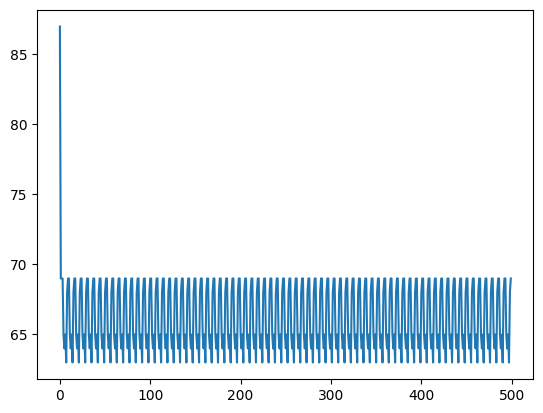

In [42]:
plt.plot(loads_500)

Looks like the cycle length is 7 in this case!

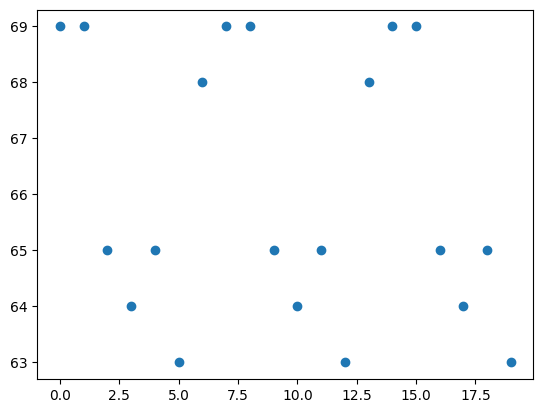

In [46]:
# plt.plot(loads_500[100:120])
plt.scatter(np.arange(0,20), loads_500[100:120])

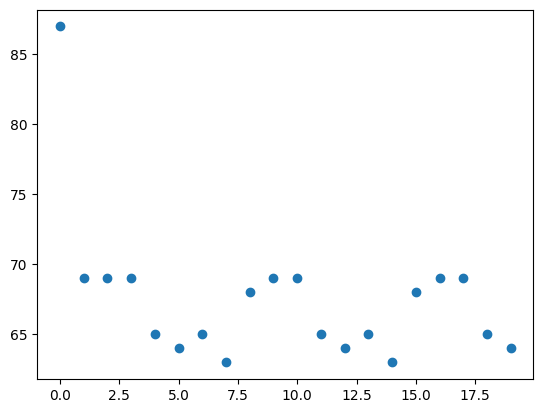

In [48]:
plt.scatter(np.arange(0,20), loads_500[0:20])

starts cycling at t = 2

In [62]:
cycle = loads_500[4:(4+7)]
print(cycle)
n = 1000000000
start = 4
div = int((n-start) / 7)
print(n - start - div * 7)
print(cycle[n - start - div * 7])


[65, 64, 65, 63, 68, 69, 69]
2
65


In [77]:
cycle = loads_500[4:(4+7)]
print(cycle)
n = 1000000000
start = 4
div = (n-start) % 7
print(div)
print(cycle[div-1])
# print(n - start - div * 7)
# print(cycle[n - start - div * 7])


[97488, 97052, 96573, 96203, 95798, 95467, 95158]
2
97052


Now let's try the big input

In [69]:
loads_500 = spin_n_and_get_load_every_time(input, 500)

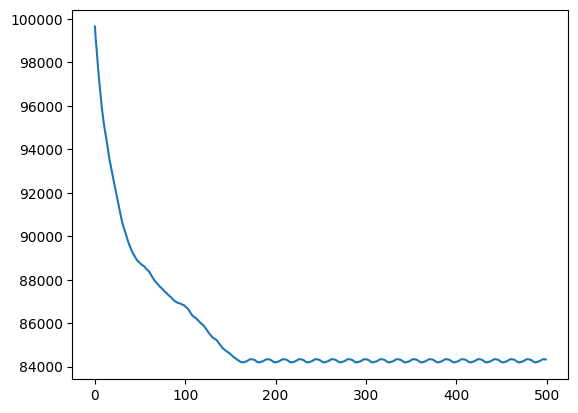

In [70]:
plt.plot(loads_500)

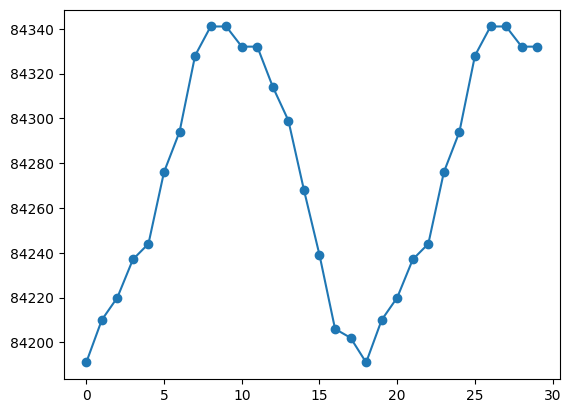

In [74]:
plt.plot(loads_500[200:230])
plt.scatter(np.arange(0,30), loads_500[200:230])

So it seems now the cycle is 18

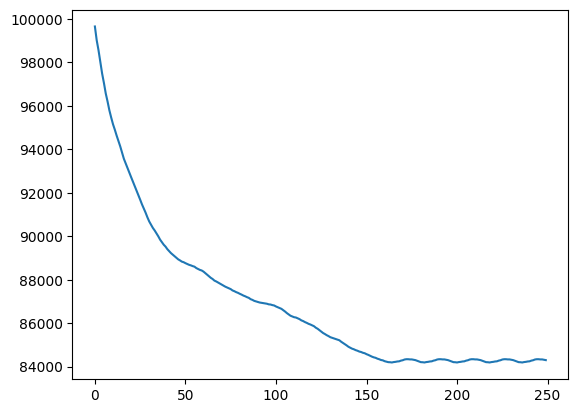

In [76]:
plt.plot(loads_500[0:250])
# plt.scatter(np.arange(0,30), loads_500[200:230])

In [78]:
cycle = loads_500[200:(200+18)]
print(cycle)
n = 1000000000
start = 200
div = (n-start) % 18
print(div)
print(cycle[div-1])
# print(n - start - div * 7)
# print(cycle[n - start - div * 7])


[84191, 84210, 84220, 84237, 84244, 84276, 84294, 84328, 84341, 84341, 84332, 84332, 84314, 84299, 84268, 84239, 84206, 84202]
8
84328


That's the right answer! Bit manual work this time but that's fine :)